<div style="font-family: 'Arial', sans-serif; background-color: #f7f7f7; padding: 20px; border-radius: 8px;">
  <!-- Notebook Header Section -->
  <div style="background-color: #640D5F; color: white; padding: 20px; border-radius: 8px;">
    <h1 style="text-align: center; font-size: 2.5rem; font-weight: bold;">🌧️USA Rainfall Prediction</h1>
<!--     <img src="https://static.tacdn.com/img2/brand_refresh/application_icons/post-image-550x370.png" style="display: block; margin-left: auto; margin-right:        auto; width: 50%;"> -->
    <p style="text-align: center; font-size: 1.1rem;">Created by <strong>Ahmed Saqr</strong> </p> 
  </div>
</div>


<div style="font-family: Arial, Helvetica, sans-serif; background-color: #f7f7f7; padding: 20px; border-radius: 8px;">
    <!-- Introduction/Overview Section -->
    <div style="background-color: #640D5F; color: white; padding: 20px; border-radius: 8px;">
        <div style="margin-top: 30px;">
            <h2 aria-label="Dataset Overview" style="font-size: 1.6rem;font-weight: bold;">📊 About Dataset</h2>
            <p style="font-size: 1.2rem;">
                This dataset provides comprehensive weather data collected from 20 major cities across the USA during the years 2024 and 2025. 🌍 It contains a variety of weather attributes that are crucial for predicting whether it will rain the next day or not. With over 2 years of daily data, this dataset serves as a perfect starting point for building predictive models, analyzing weather trends, or even developing weather-related applications. 📊 </p>
            <p style="font-size: 1.2rem;">
                Each row represents a single day's weather conditions, including important features like temperature, humidity, wind speed, cloud cover, atmospheric pressure, and precipitation. The target feature, "Rain Tomorrow," is a binary label (1 = Yes, 0 = No) indicating whether it rained the next day. ☔
            </p>
        </div>
        <div style="margin-top: 30px;">
            <h2 aria-label="Dataset Overview" style="font-size: 1.6rem;font-weight: bold;">🎇 Data Attributes:</h2>
            <p style="font-size: 1.1rem;">
                The dataset includes the following key attributes:
            </p>
            <ul style="font-size: 1.1rem;">
                <li><strong>Date</strong> - The specific day when the weather data was recorded.</li>
                <li><strong>Location</strong> - The geographical area or weather station where the data was collected.</li>
                <li><strong>Temperature</strong> - The average temperature recorded on the specified date.</li>
                <li><strong>Humidity</strong> - The percentage of moisture in the air on the given day.</li>
                <li><strong>Wind Speed</strong> - The speed of the wind measured during the observation period.</li>
                <li><strong>Precipitation</strong> - The amount of rainfall recorded on the day.</li>
                <li><strong>Cloud Cover</strong> - The proportion of the sky covered by clouds, typically measured in oktas or as a percentage.</li>
                <li><strong>Pressure</strong> - The atmospheric pressure recorded on the day, indicating weather conditions.</li>
                <li><strong>Rain Tomorrow</strong> - A binary indicator (1 = Yes, 0 = No), predicting whether it will rain the next day.</li>
                <!-- Add more features as needed -->
            </ul>
        </div>
    </div>
</div>

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    📦 Import Necessary Libraries
  </h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import warnings
warnings.filterwarnings("ignore")

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    💾 Load The Data
  </h2>
</div>

In [2]:
df = pd.read_csv("data/usa_rain_prediction_dataset_2024_2025.csv")

In [3]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    ✅ Check of Data 
  </h2>
</div>

In [4]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 9
Number of Rows: 73100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


<Axes: >

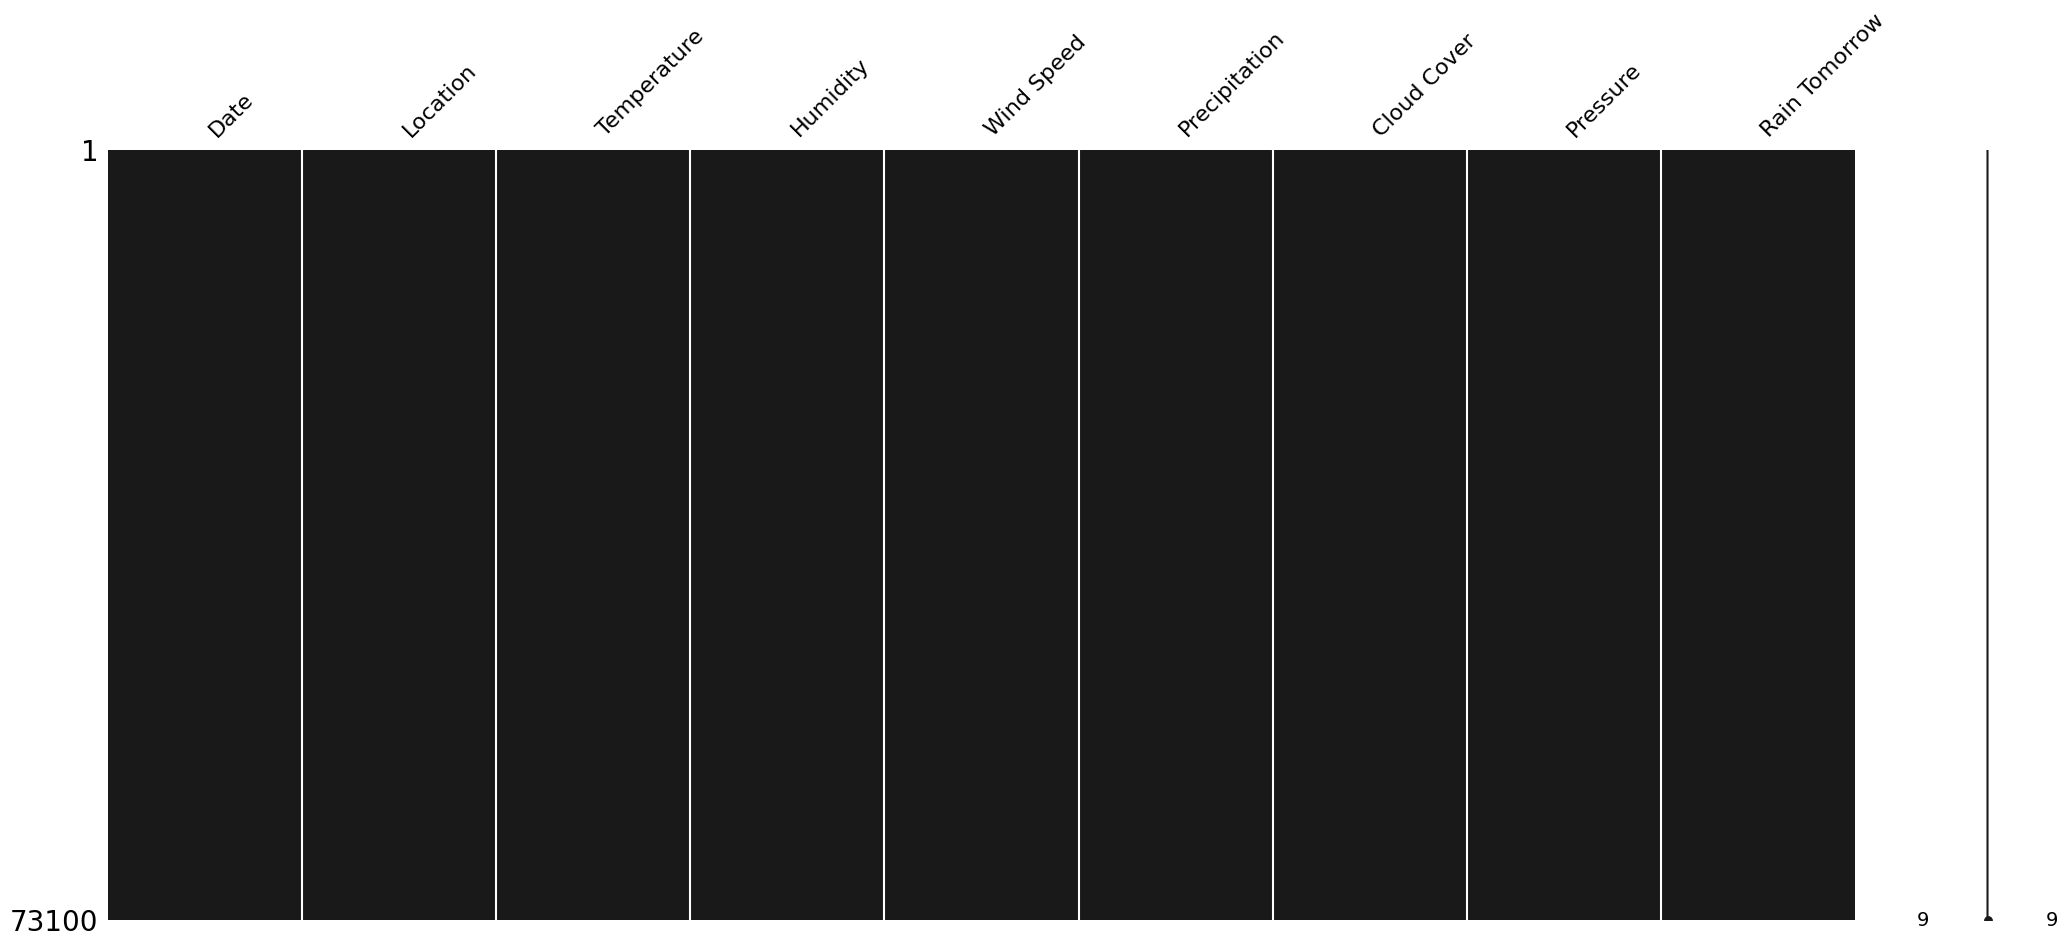

In [19]:
msno.matrix(df, color=(0.1, 0.1, 0.1))

In [7]:
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    📊 Exploratory Data Analysis
  </h2>
</div>

In [8]:
des = df.describe().transpose()
des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Temperature,73100.000000,65.182270,20.205793,30.000766,47.678968,65.294949,82.636570,99.997393
Humidity,73100.000000,59.875041,23.066115,20.000272,39.800732,59.887840,79.835990,99.999025
Wind Speed,73100.000000,15.017946,8.668729,0.000712,7.485182,15.102495,22.551794,29.999017
Precipitation,73100.000000,0.390635,0.474833,0.000000,0.000000,0.196909,0.673177,3.078090
Cloud Cover,73100.000000,54.942807,25.982487,10.000856,32.318668,55.011121,77.412469,99.998957
Pressure,73100.000000,1005.176013,20.203889,970.000919,987.697646,1005.284188,1022.727410,1039.999765
Rain Tomorrow,73100.000000,0.220410,0.414526,0.000000,0.000000,0.000000,0.000000,1.000000


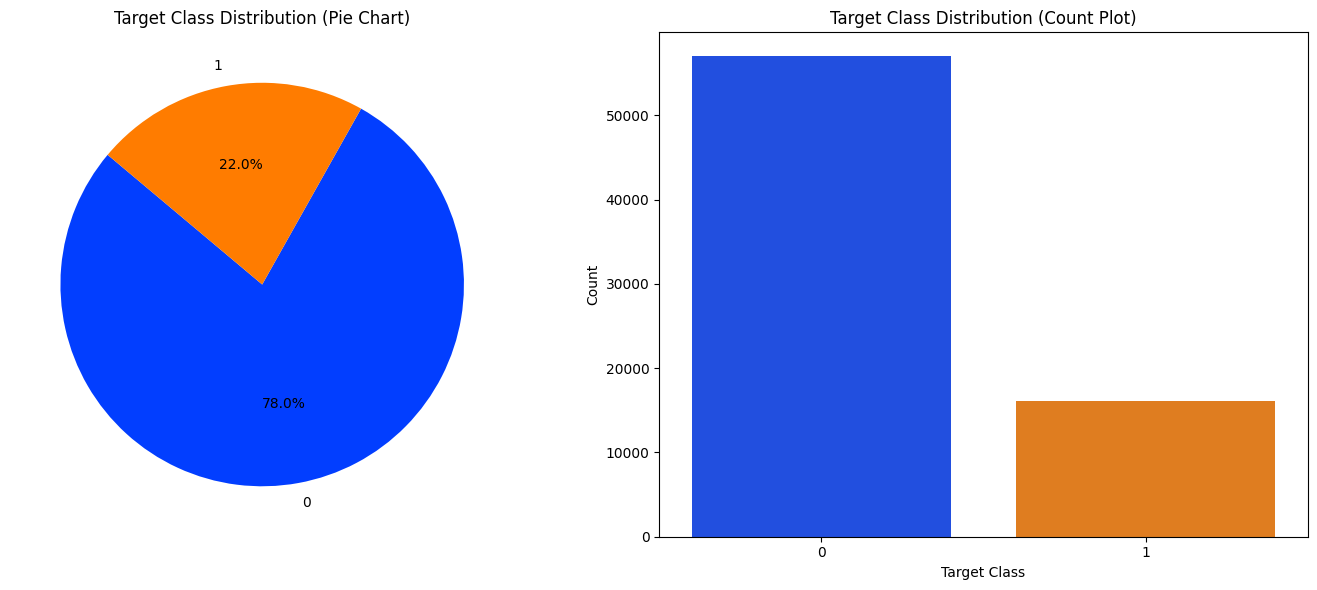

In [10]:
target_counts = df["Rain Tomorrow"].value_counts().sort_index()

palette = sns.color_palette("bright", n_colors=len(target_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Target Class Distribution (Pie Chart)')
sns.countplot(x="Rain Tomorrow", data=df, ax=ax2, order=target_counts.index, palette=palette)
ax2.set_title('Target Class Distribution (Count Plot)')
ax2.set_xlabel('Target Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

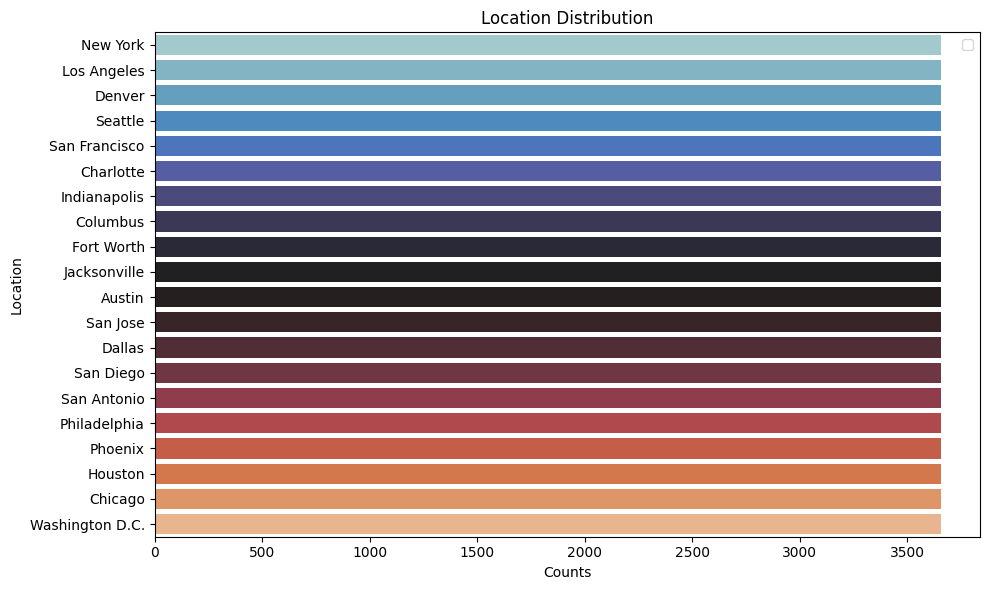

In [30]:
location_counts = df["Location"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="icefire")
plt.title("Location Distribution")
plt.xlabel("Counts")
plt.ylabel("Location")
plt.tight_layout()

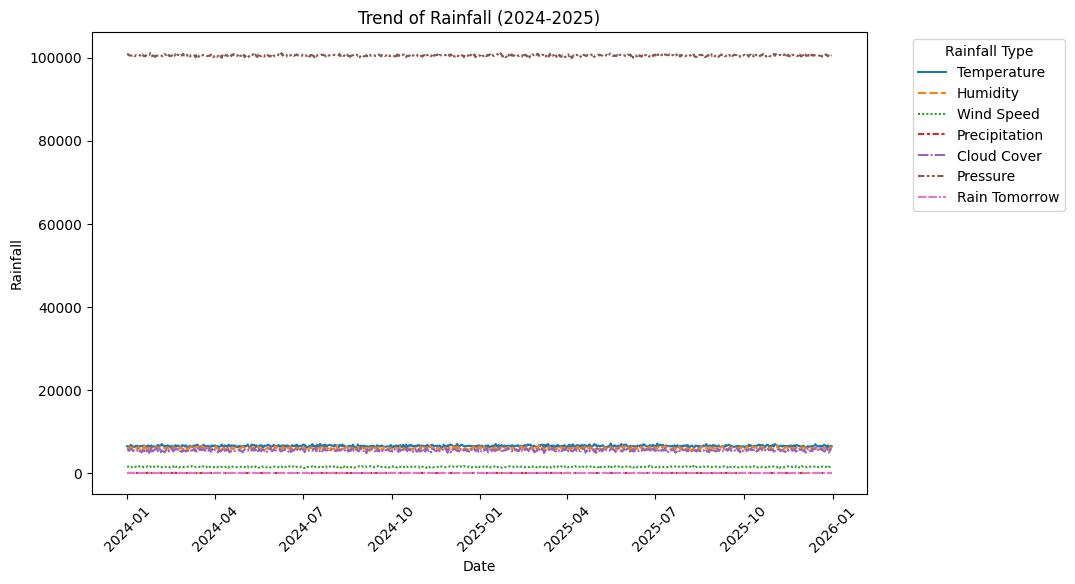

In [75]:
df["Date"] = df["Date"].apply(lambda date: datetime.strptime(date, "%Y-%m-%d"))

rain_trend = df.groupby("Date").sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=rain_trend)
plt.title('Trend of Rainfall (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.legend(title="Rainfall Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

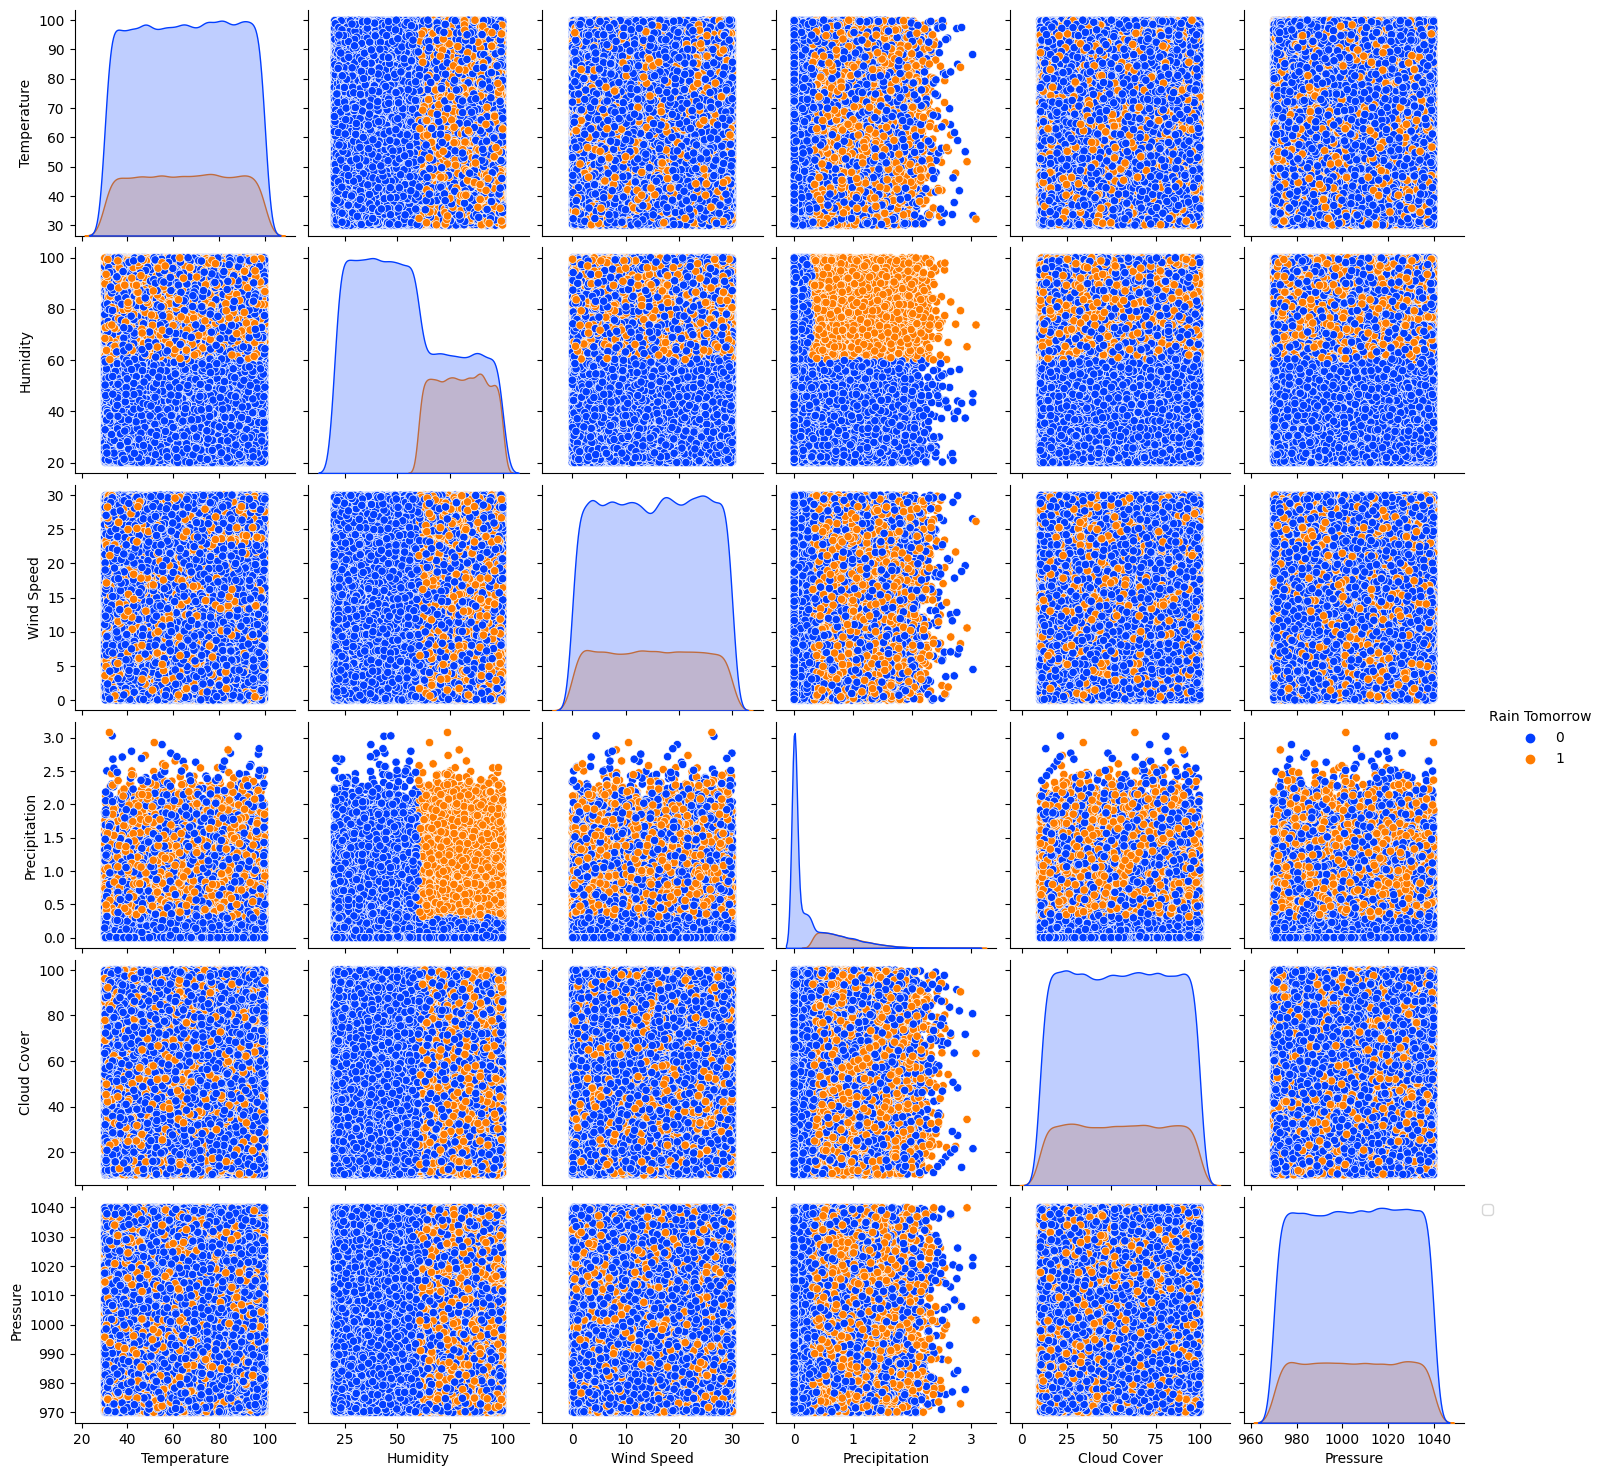

In [12]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, hue="Rain Tomorrow", palette="bright")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

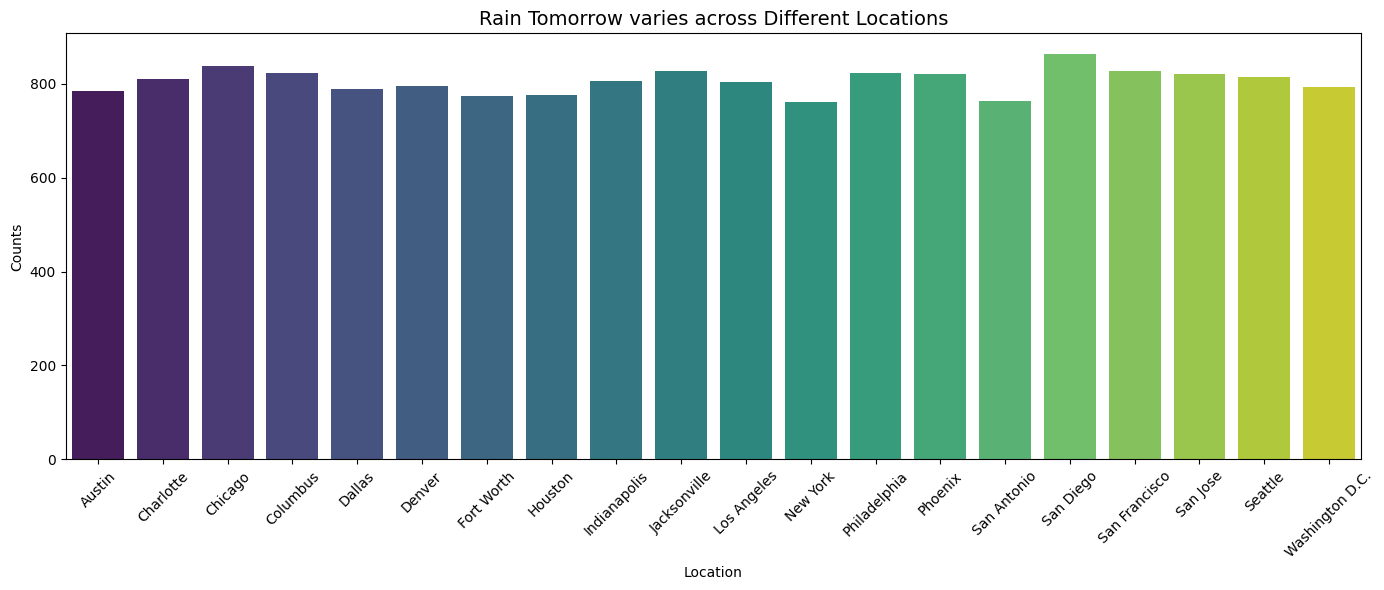

In [51]:
rain_by_location = df.groupby("Location")["Rain Tomorrow"].sum()

plt.figure(figsize=(14, 6))
sns.barplot(x=rain_by_location.index, y=rain_by_location.values, palette="viridis")
plt.title("Rain Tomorrow varies across Different Locations", fontsize=14)
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Counts")
plt.tight_layout()

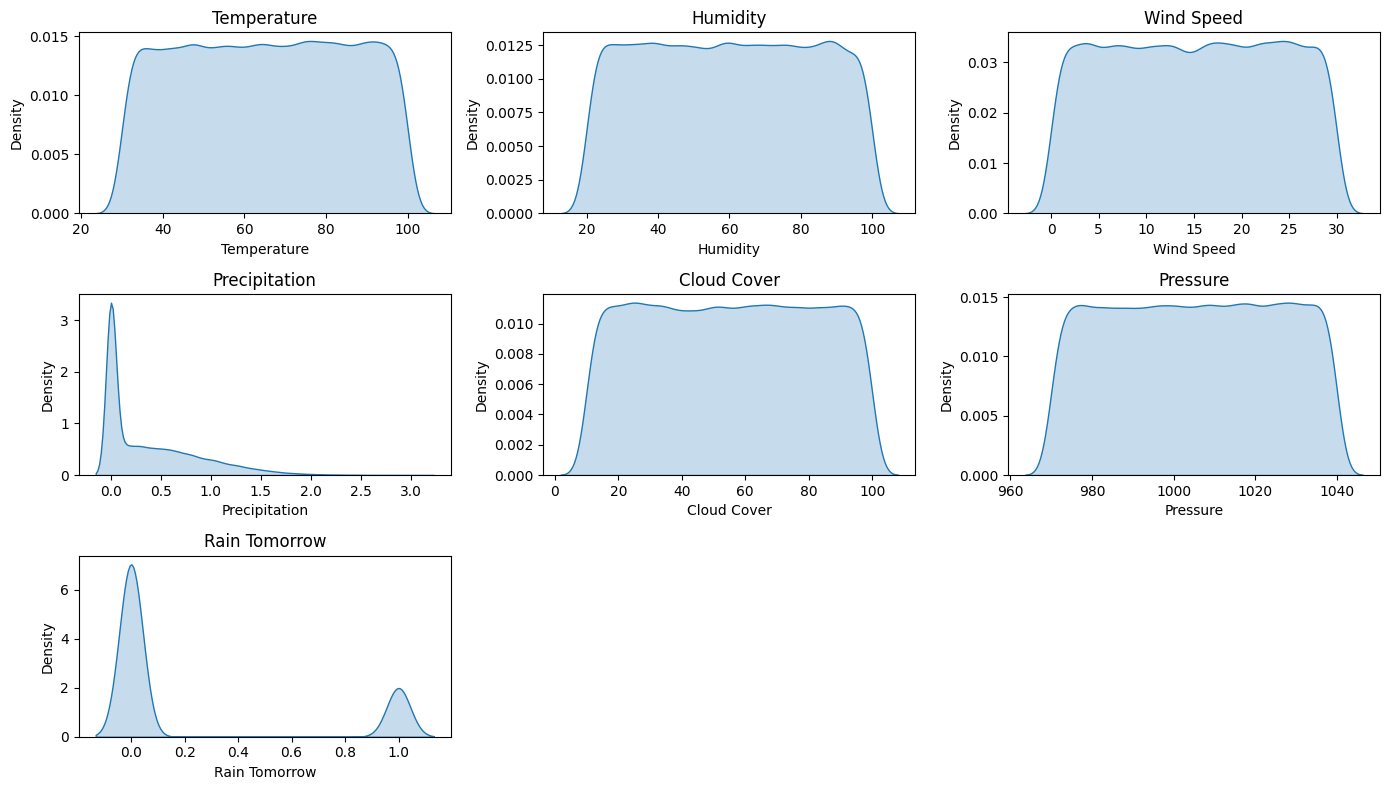

In [56]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=feature, fill=True)
    plt.title(f"{feature}")
plt.tight_layout()

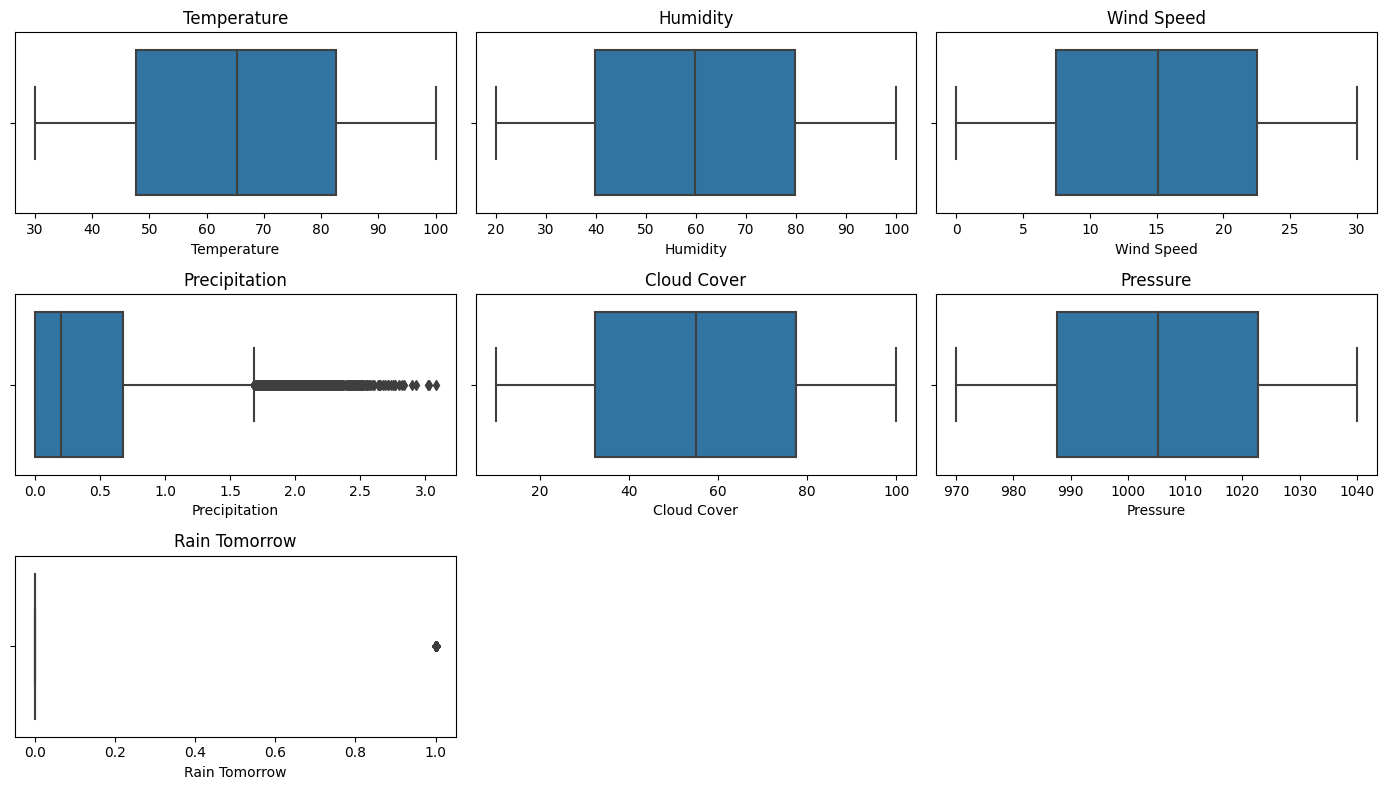

In [57]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"{feature}")
plt.tight_layout()

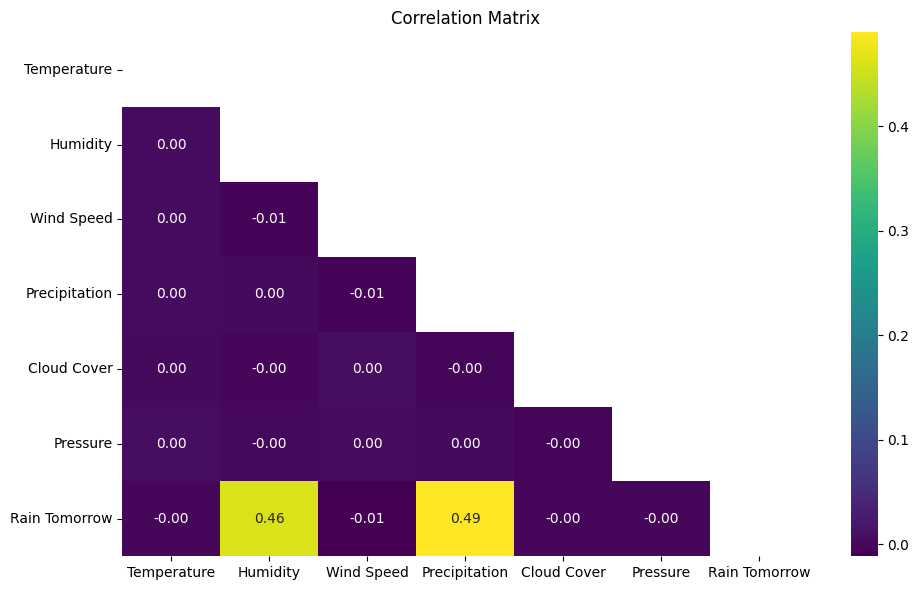

In [60]:
corr = df.select_dtypes(include="number").corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

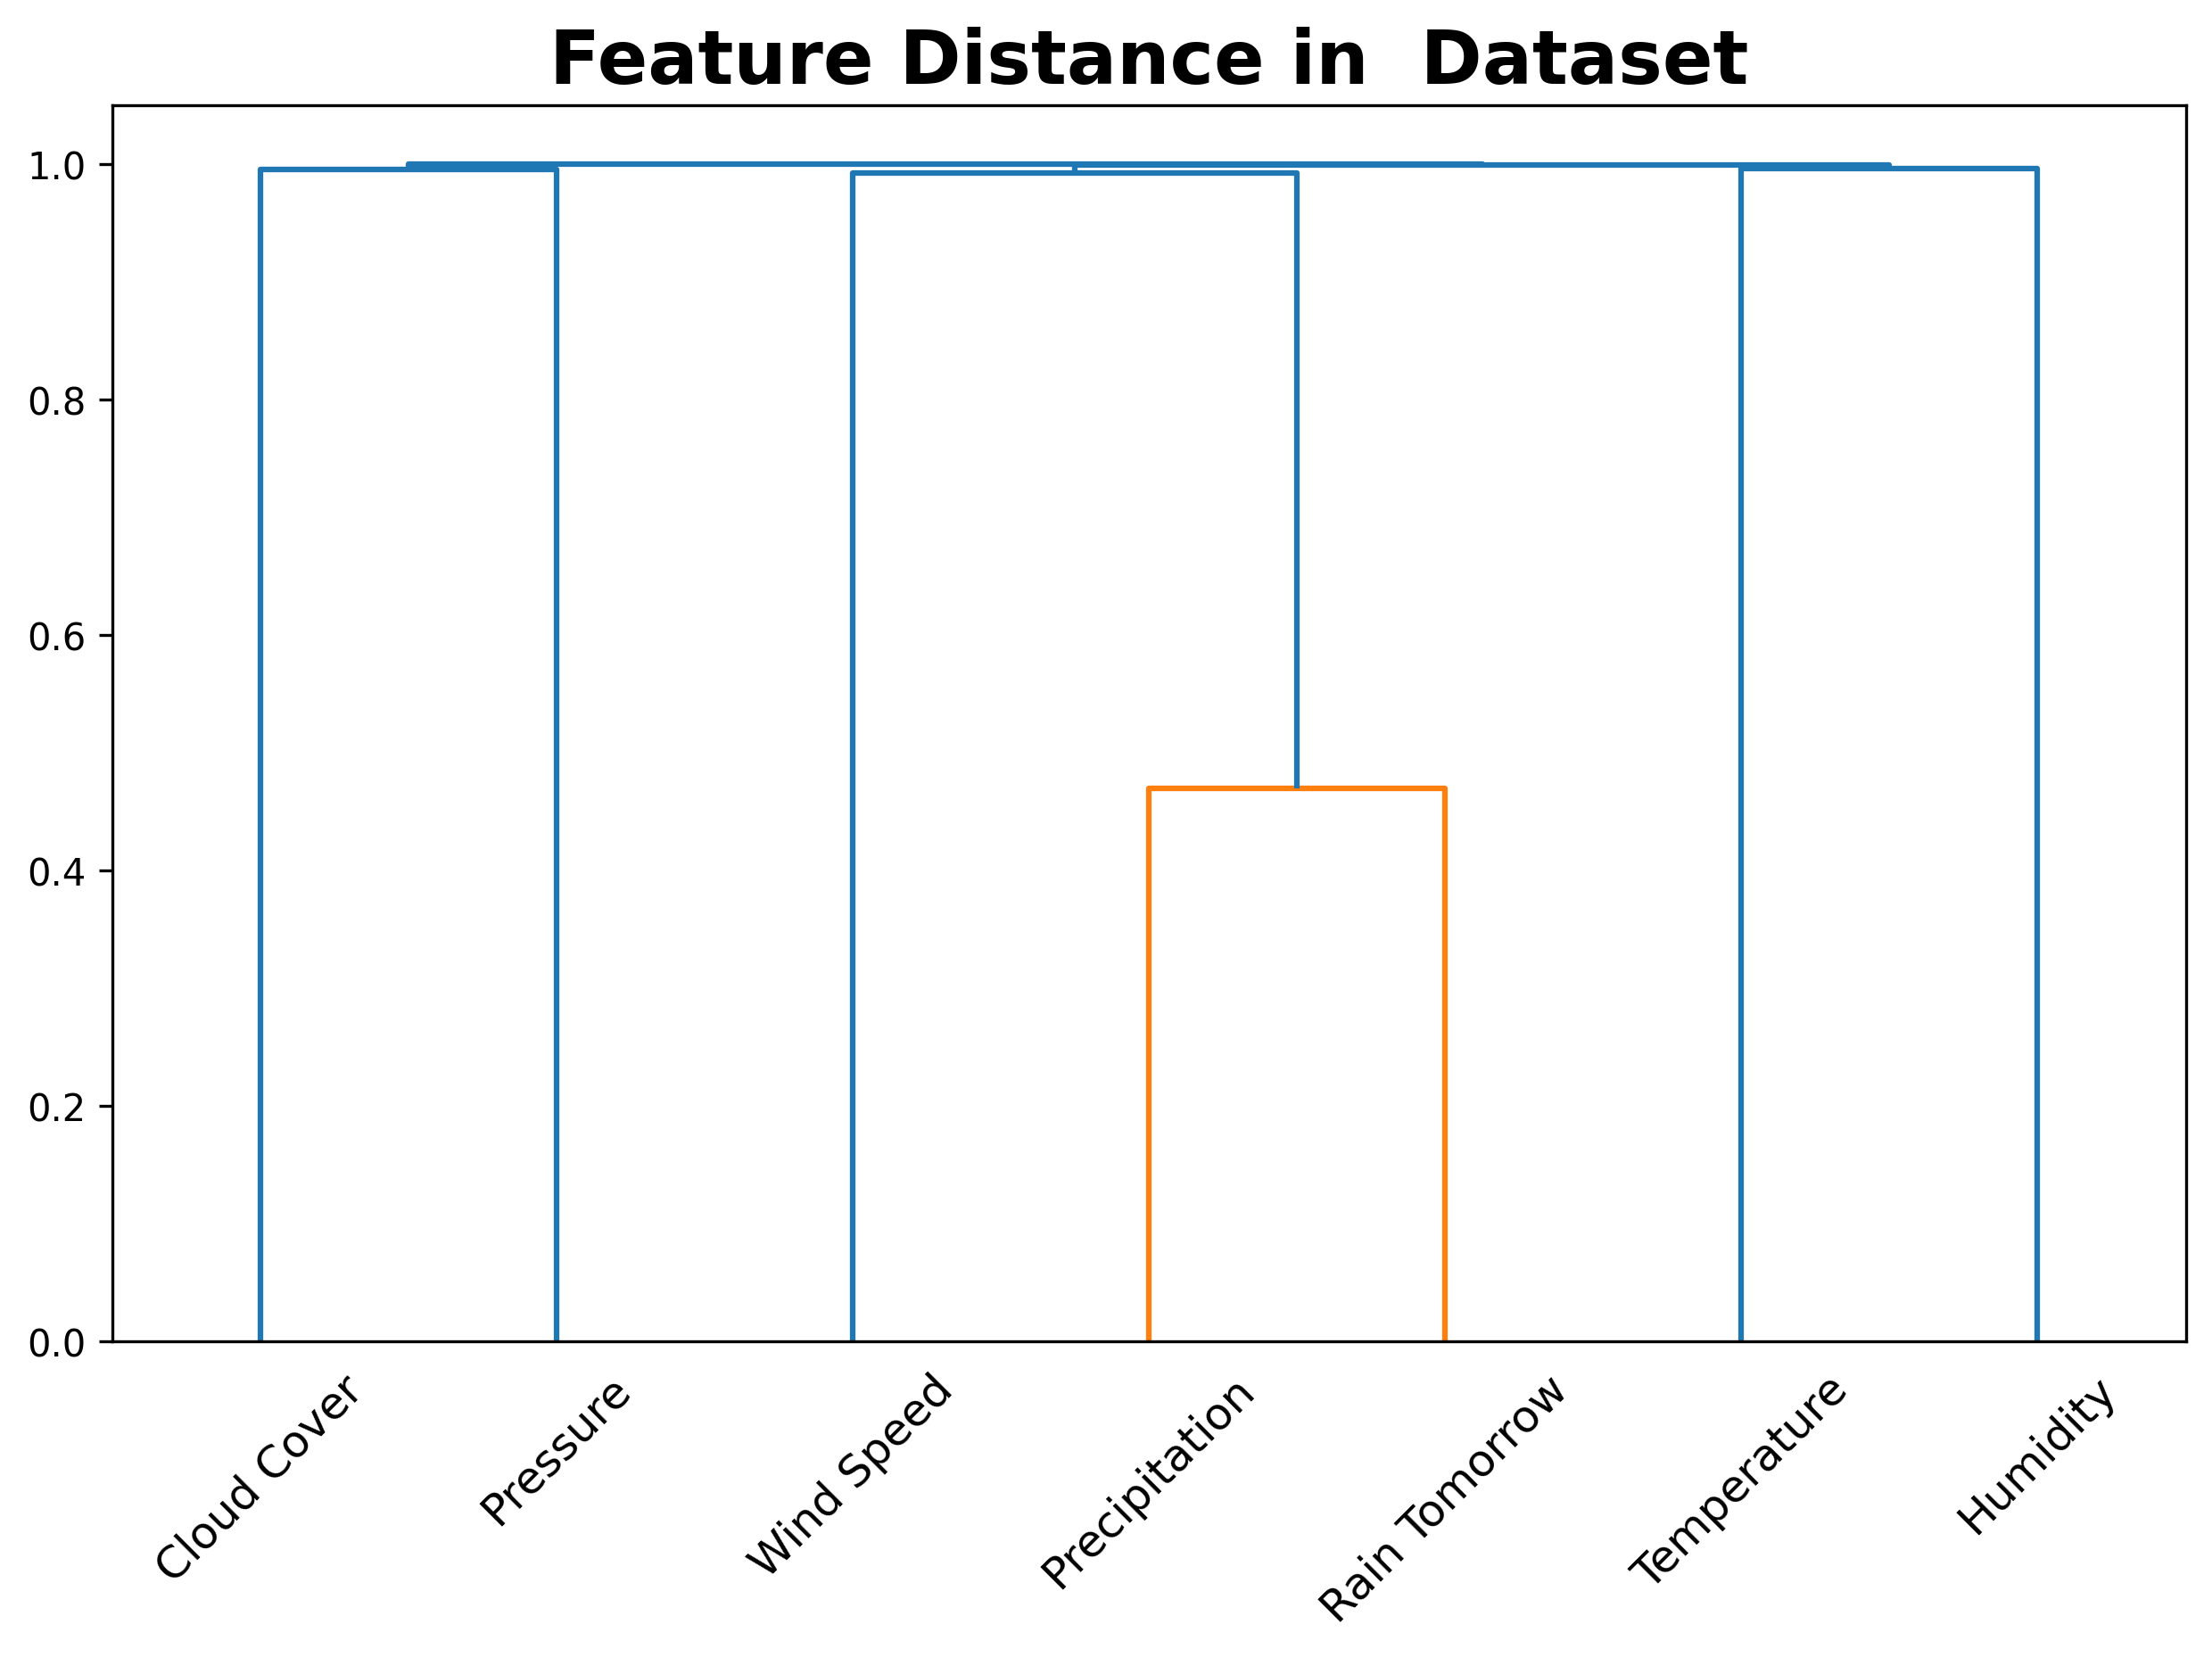

In [68]:
def distance(data, label = ''):
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (10, 6), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=45)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 20)
    plt.show()

distance(df.select_dtypes(include="number"))

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    🔎 Outliers Treatment
  </h2>
</div>

In [3]:
q1 = df["Precipitation"].quantile(0.25)
q3 = df["Precipitation"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Precipitation"] < upper_limit) & (df["Precipitation"] > lower_limit)]

In [4]:
df.shape

(71908, 9)

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    ⛏ Feature Engineering
  </h2>
</div>

In [7]:
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']
df['Wind_Cloud_Ratio'] = df['Wind Speed'] / df['Cloud Cover']
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [8]:
encoder = LabelEncoder()
df["Location"] = encoder.fit_transform(df["Location"])

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    ✂️ Train Test Split
  </h2>
</div>

In [9]:
X = df.drop(["Date", "Rain Tomorrow"], axis=1)
y = df["Rain Tomorrow"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57526, 12), (14382, 12), (57526,), (14382,))

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    🏛️ Model Building
  </h2>
</div>

In [90]:
# with RandomForestClassifier
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    
    model = RandomForestClassifier(**param, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=5)

print("Best RandomForest Params:", study_rf.best_params)
print("Best RandomForest Accuracy:", study_rf.best_value)

[I 2024-10-03 07:12:02,642] A new study created in memory with name: no-name-a1538c67-9526-44dd-85c1-2caa9edad9c5
[I 2024-10-03 07:12:50,962] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 513, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 11, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-03 07:14:16,291] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 915, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 11, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-03 07:14:29,642] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 210, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 16, 'bootstrap': True}. Best is trial 0 with value: 1.0.
[I 2024-10-03 07:14:52,738] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 244, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 7, 'bootstrap': False}. Best is trial 0 with value: 1.0.
[I 2024-10-03 07

Best RandomForest Params: {'n_estimators': 513, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 11, 'bootstrap': False}
Best RandomForest Accuracy: 1.0


In [91]:
# with KNN
def objective_knn(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 15),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2), 
    }
    
    model = KNeighborsClassifier(**param)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=20)

print("Best KNN Params:", study_knn.best_params)
print("Best KNN Accuracy:", study_knn.best_value)

[I 2024-10-03 07:16:21,041] A new study created in memory with name: no-name-5db174bb-42be-40e2-a948-a16fc0f12322
[I 2024-10-03 07:16:22,668] Trial 0 finished with value: 0.7832707551105549 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7832707551105549.
[I 2024-10-03 07:16:23,143] Trial 1 finished with value: 0.7692254206647198 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7832707551105549.
[I 2024-10-03 07:16:23,543] Trial 2 finished with value: 0.7637324433319427 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7832707551105549.
[I 2024-10-03 07:16:24,021] Trial 3 finished with value: 0.7703379224030038 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7832707551105549.
[I 2024-10-03 07:16:25,241] Trial 4 finished with value: 0.772215269086358 and parameters: {'n_neighbors': 4, 'weights':

Best KNN Params: {'n_neighbors': 10, 'weights': 'uniform', 'p': 1}
Best KNN Accuracy: 0.7847309136420526


In [87]:
# with XGBoost
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-3, 1e-1, log=True),
        'lambda': trial.suggest_float('lambda', 1e-3, 1e-1, log=True),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**param)
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20)

print("Best XGB Params:", study_xgb.best_params)
print("Best XGB Accuracy:", study_xgb.best_value)

[I 2024-10-03 07:02:55,519] A new study created in memory with name: no-name-d0e18f02-3d87-426f-889e-67db590506dc
[I 2024-10-03 07:02:56,877] Trial 0 finished with value: 0.999165623696287 and parameters: {'n_estimators': 863, 'max_depth': 9, 'learning_rate': 0.09622319203912148, 'colsample_bytree': 0.7766227267316271, 'subsample': 0.9669981051242631, 'alpha': 0.0035325699571917874, 'lambda': 0.0011141981261316293}. Best is trial 0 with value: 0.999165623696287.
[I 2024-10-03 07:02:59,246] Trial 1 finished with value: 0.999165623696287 and parameters: {'n_estimators': 337, 'max_depth': 8, 'learning_rate': 0.018012336286158934, 'colsample_bytree': 0.9170479552331021, 'subsample': 0.7597187552180502, 'alpha': 0.012703426779782555, 'lambda': 0.001630243060251579}. Best is trial 0 with value: 0.999165623696287.
[I 2024-10-03 07:03:02,630] Trial 2 finished with value: 0.9990960923376443 and parameters: {'n_estimators': 847, 'max_depth': 4, 'learning_rate': 0.030728278711504978, 'colsample_b

Best XGB Params: {'n_estimators': 181, 'max_depth': 3, 'learning_rate': 0.011108357466595638, 'colsample_bytree': 0.6886007666267417, 'subsample': 0.946835084392708, 'alpha': 0.0014982558106195838, 'lambda': 0.005012642328501987}
Best XGB Accuracy: 0.9993046864135725


In [85]:
# with CatBoost
def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 1e-1, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0
    }
    
    model = CatBoostClassifier(**param, random_state=42)
    
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective_catboost, n_trials=20)

print("Best CatBoost Params:", study_catboost.best_params)
print("Best CatBoost Accuracy:", study_catboost.best_value)

[I 2024-10-03 06:58:28,748] A new study created in memory with name: no-name-012440eb-a41a-4aa3-8a80-7800f3a9dcaf
[I 2024-10-03 06:58:33,504] Trial 0 finished with value: 0.9970101515783618 and parameters: {'iterations': 506, 'depth': 5, 'learning_rate': 0.005502820899966624, 'l2_leaf_reg': 0.0020287024716783802, 'border_count': 34, 'random_strength': 0.10377932221831455, 'bagging_temperature': 0.7707424305612715}. Best is trial 0 with value: 0.9970101515783618.
[I 2024-10-03 06:58:54,871] Trial 1 finished with value: 0.9996523432067863 and parameters: {'iterations': 770, 'depth': 10, 'learning_rate': 0.005492979336010875, 'l2_leaf_reg': 0.0014010954321948285, 'border_count': 165, 'random_strength': 4.760881551505601, 'bagging_temperature': 0.6653586056754557}. Best is trial 1 with value: 0.9996523432067863.
[I 2024-10-03 06:59:28,535] Trial 2 finished with value: 0.9996523432067863 and parameters: {'iterations': 861, 'depth': 10, 'learning_rate': 0.003586278214919564, 'l2_leaf_reg': 0

Best CatBoost Params: {'iterations': 770, 'depth': 10, 'learning_rate': 0.005492979336010875, 'l2_leaf_reg': 0.0014010954321948285, 'border_count': 165, 'random_strength': 4.760881551505601, 'bagging_temperature': 0.6653586056754557}
Best CatBoost Accuracy: 0.9996523432067863


In [11]:
params = {
    'n_estimators': 513, 
    'max_depth': 17, 
    'min_samples_split': 3, 
    'min_samples_leaf': 11, 
    'bootstrap': False
}

final_model = RandomForestClassifier(**params)
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=17, min_samples_leaf=11,
                       min_samples_split=3, n_estimators=513)

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    📋 Evaluation
  </h2>
</div>

In [12]:
y_pred = final_model.predict(X_test)

print(f"Accuracy Score is: {(accuracy_score(y_test, y_pred) * 100):0.2f}")

Accuracy Score is: 100.00


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11285
           1       1.00      1.00      1.00      3097

    accuracy                           1.00     14382
   macro avg       1.00      1.00      1.00     14382
weighted avg       1.00      1.00      1.00     14382



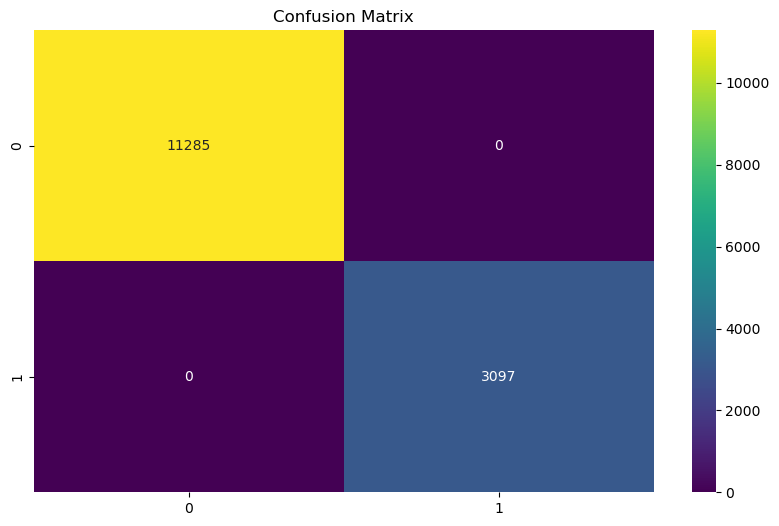

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

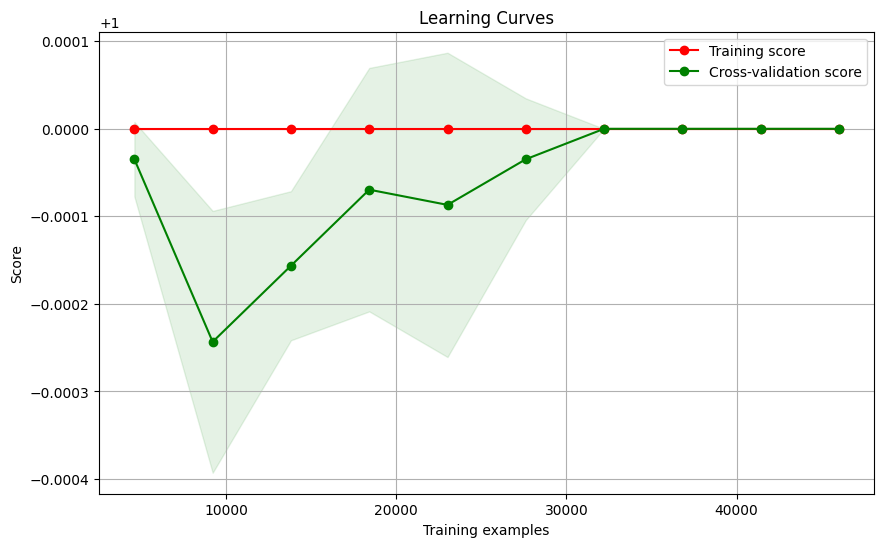

In [114]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

<div style="font-family: Arial, Helvetica, sans-serif; background-color: #640D5F; color: white; padding: 20px; border-radius: 8px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h2 style="font-size: 2rem; font-weight: bold; margin: 0;">
    📂 Save the Model
  </h2>
</div>

In [17]:
import pickle

with open("models/encoder.pkl", "wb") as encoderFile:
    pickle.dump(encoder, encoderFile)

In [19]:
with open("models/USA_rainfall_prediction_model_100%.pkl", "wb") as modelFile:
    pickle.dump(final_model, modelFile)